<a href="https://colab.research.google.com/github/ALF2002/UAS-Prak-AI/blob/main/UAS_PrakAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.9 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.14-py2.py3-none-any.whl size=33654 sha256=e2bf6d227cd4d8dc4757619f8a44a9d637c83cb157acb0635c62801a6324ec1a
  Stored in directory: /root/.cache/pip/wheels/d9/6a/86/9a622c06f65732afe0e31c02a92fae6ab663ffd7162bcf5125
Successfully built jcopml


In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

In [4]:
df = pd.read_csv('/content/sample_data/dataset.csv')
df

,jenis_kelamin,pekerjaan,status,ipk,lulus
0,laki,mhs,belum,3.17,tepat
1,laki,bekerja,belum,3.30,tepat
2,perempuan,mhs,belum,3.01,tepat
3,perempuan,mhs,menikah,3.25,tepat
4,laki,bekerja,menikah,3.20,terlambat
5,laki,bekerja,menikah,2.50,terlambat
6,perempuan,bekerja,menikah,3.00,terlambat
7,perempuan,bekerja,belum,2.70,terlambat
8,laki,bekerja,belum,2.40,terlambat
9,perempuan,mhs,menikah,2.50,terlambat


In [5]:
X = df.drop(columns="lulus")
y = df.lulus

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 4), (3, 4), (12,), (3,))

In [7]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["ipk"]),
    ('categoric', cat_pipe(encoder='onehot'), ['jenis_kelamin', 'pekerjaan', 'status']),
])

In [8]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ipk']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['jenis_kelamin', 'pekerjaan',
                                                   'status'])])),
                ('algo', GaussianNB())])

In [10]:
pipeline.score(X_train, y_train)

0.9166666666666666

In [11]:
pipeline.score(X_test, y_test)

1.0

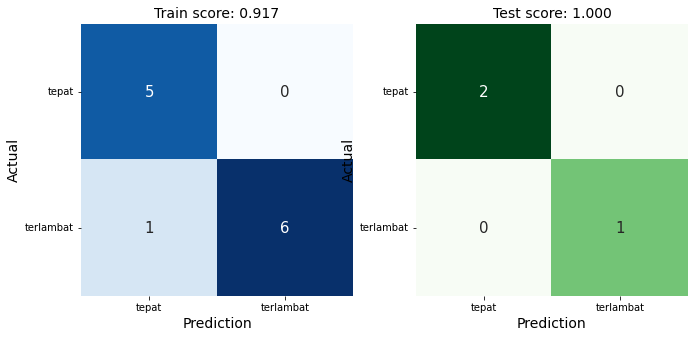

In [12]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

In [1]:
#Tes Prediction

In [13]:
X_pred = pd.read_csv('/content/sample_data/testing.csv')
X_pred

,jenis_kelamin,pekerjaan,status,ipk
0,laki,mhs,belum,2.7


In [14]:
pipeline.predict(X_pred)

array(['terlambat'], dtype='<U9')

In [15]:
X_pred["lulus"] = pipeline.predict(X_pred)
X_pred

,jenis_kelamin,pekerjaan,status,ipk,lulus
0,laki,mhs,belum,2.7,terlambat
